The below took approximately three and half hours, including debugging.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Import Jesus CSV data.
CO_abs_dat = np.loadtxt("data\Jesus_data\Collection (160 scans) with CO in Ar at 0.CSV", delimiter=',')
CO_ref_dat = np.loadtxt('data\Jesus_data\Reference after 3 more cycles.CSV', delimiter=',')
diff = (CO_ref_dat[:,1] - CO_abs_dat[CO_abs_dat[:,0] >= 2300][0,1]) * -1

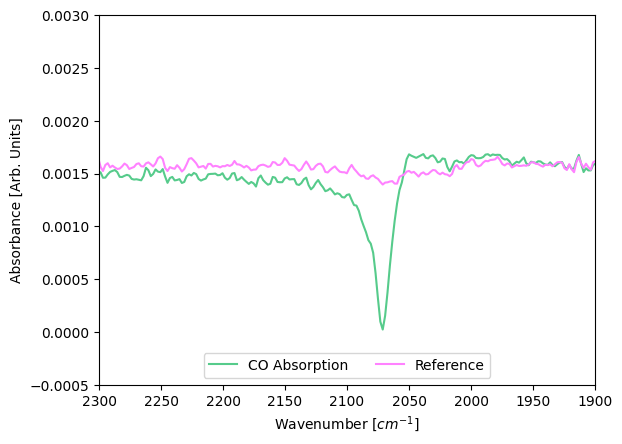

In [53]:
fig, ax = plt.subplots()
ax.plot(CO_abs_dat[:,0], CO_abs_dat[:,1], color='#56cb8b', label='CO Absorption')
ax.plot(CO_ref_dat[:,0], CO_ref_dat[:,1] + np.mean(diff), color='#ff82ff', label='Reference')
plt.xlim([1900, 2300])
plt.gca().invert_xaxis()
plt.ylim([-0.0005, 0.003])
plt.xlabel("Wavenumber [$cm^{-1}$]")
plt.ylabel("Absorbance [Arb. Units]")
ax.legend(loc='lower center', ncols=2)
plt.show()

In [3]:
# Write code that can process and parse .DTA files.
def read_parse_dta(path):
    dat_file = open(path, mode='r')
    line = dat_file.readline()
    dat_dict = {}
    while line != '':
        # Read until it finds a line with a CURVE specification.
        if 'CURVE' in line:
            # Store the curve number as a new dict key.
            new_key = line.split('\t')[0]
            # Read the next line.
            line = dat_file.readline()
            # Define the array storage.
            curve_arr = []
            # Make a dictionary element that has the column headers. Call it 'key'
            if 'key' not in dat_dict:
                key_arr = [line.strip().split(sep='\t')]
                line = dat_file.readline()
                key_arr.append(line.strip().split(sep='\t'))
                key_arr = np.transpose(key_arr)
                key_arr = np.delete(key_arr, obj=8, axis=0)
                dat_dict.update({'key': key_arr})
                line = dat_file.readline()
            # If key already exists, skip the column header lines.
            else:
                line = dat_file.readline()
                line = dat_file.readline()
            # Build the data array by reading lines until we hit the next curve specification.
            while 'CURVE' not in line:
                if line == '':
                    break
                # Add the data line to the array storing the curve data.
                add_line = line.strip().split('\t')
                add_line = np.delete(add_line, obj=8, axis=0)
                add_line = add_line.astype(float, copy=False)
                curve_arr.append(add_line)
                # Proceed to the next line.
                line = dat_file.readline()

            # At this point, we have reached the next curve.
            # Add the curve to the data dictionary.
            dat_dict.update({new_key:np.asarray(curve_arr)})
            
        # If there is not CURVE in the line and we are not reading data, skip the line.
        else:
            line = dat_file.readline()

    # We have now processed the whole file.
    # Close the file.
    dat_file.close()
    # Return the data directory.
    return dat_dict

In [21]:
curve_data = read_parse_dta('data\Jesus_data\Break_in.DTA')

In [24]:
curve_data["key"]

array([['Pt', '#'],
       ['T', 's'],
       ['Vf', 'V vs. Ref.'],
       ['Im', 'A'],
       ['Vu', 'V'],
       ['Sig', 'V'],
       ['Ach', 'V'],
       ['IERange', '#'],
       ['Temp', 'deg C']], dtype='<U10')

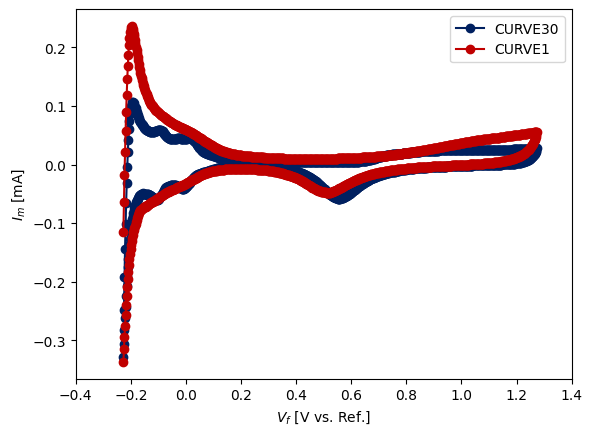

In [55]:
fig, ax = plt.subplots()
ax.plot(curve_data["CURVE30"][:,2], 1000 * curve_data["CURVE30"][:,3], marker='o', color='#002060', label="CURVE30")
ax.plot(curve_data["CURVE1"][:,2], 1000 * curve_data["CURVE1"][:,3], marker='o', color='#c00000', label="CURVE1")
ax.set_xlim([-0.4, 1.4])
ax.set_xlabel("$V_f$ [V vs. Ref.]")
ax.set_ylabel("$I_m$ [mA]")
ax.legend(loc='best')
plt.show()